In [ ]:
print ("hello world")

hello world


In [ ]:
# Basic Python Packages
import os
import random
import time
import pickle

# Numpy Library
import numpy as np

# Pandas Library and Settings
import pandas as pd

# Visualization Libraries (Matplotlib, Seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

# SKLearn Libarary
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

# Tensorflow Library
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.metrics import Accuracy, CategoricalAccuracy
from tensorflow.keras.models import load_model

# OpenCV
import cv2

%matplotlib inline

In [ ]:
gpus = tf.config.experimental.list_physical_devices("GPU")

for gpu in gpus:
    print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [ ]:
data_directory = "/content/drive/MyDrive/emotion detection/emotion dataset"

print(f"{os.listdir(data_directory)}")

['test', 'train', 'emotion_detection_model.h5']


In [ ]:
train_directory = os.path.join(data_directory, "train")
test_directory = os.path.join(data_directory, "test")

print(f"Data directory     {data_directory}")
print(f"Train directory    {train_directory}")
print(f"Test directory     {test_directory}")

Data directory     /content/drive/MyDrive/emotion detection/emotion dataset
Train directory    /content/drive/MyDrive/emotion detection/emotion dataset/train
Test directory     /content/drive/MyDrive/emotion detection/emotion dataset/test


In [ ]:
print(f"{os.listdir(train_directory)}")
print(f"{os.listdir(test_directory)}")

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
expressions_list = os.listdir(train_directory)


In [ ]:
train_dataset_info_df = pd.DataFrame(columns=["Expression", "Size", "Proportion %"])
train_expression_size = []

for expression in expressions_list:

    index = expressions_list.index(expression)

    train_expression_directory = os.path.join(train_directory, expression)
    train_expression_size.append(len(os.listdir(train_expression_directory)))

train_expression_proportion = [round((expression_size / sum(train_expression_size)) * 100, 2)\
                               for expression_size in train_expression_size]

train_dataset_info_df["Expression"] = expressions_list
train_dataset_info_df["Size"] = train_expression_size
train_dataset_info_df["Proportion %"] = train_expression_proportion

total_size = train_dataset_info_df["Size"].sum()
total_proportion = train_dataset_info_df["Proportion %"].sum()

total_row = pd.DataFrame({"Expression": ["Total"],
                          "Size": [total_size],
                          "Proportion %": [total_proportion]})

train_dataset_info_df = pd.concat([train_dataset_info_df, total_row], ignore_index=True)

train_dataset_info_df = train_dataset_info_df.style
train_dataset_info_df = train_dataset_info_df.apply(lambda x: ['background-color: green' if\
                                                    i == len(x)-1 else ''\
                                                    for i in range(len(x))], axis=0)

train_dataset_info_df

,Expression,Size,Proportion %
0,angry,3995,13.920000
1,disgust,436,1.520000
2,fear,4097,14.270000
3,happy,7215,25.130000
4,neutral,4965,17.290000
5,sad,4830,16.820000
6,surprise,3171,11.050000
7,Total,28709,100.000000


In [ ]:
test_dataset_info_df = pd.DataFrame(columns=["Expression", "Size", "Proportion %"])
test_expression_size = []

for expression in expressions_list:

    index = expressions_list.index(expression)

    test_expression_directory = os.path.join(test_directory, expression)
    test_expression_size.append(len(os.listdir(test_expression_directory)))

test_expression_proportion = [round((expression_size / sum(test_expression_size)) * 100, 2)\
                              for expression_size in test_expression_size]

test_dataset_info_df["Expression"] = expressions_list
test_dataset_info_df["Size"] = test_expression_size
test_dataset_info_df["Proportion %"] = test_expression_proportion

total_size = test_dataset_info_df["Size"].sum()
total_proportion = test_dataset_info_df["Proportion %"].sum()

total_row = pd.DataFrame({"Expression": ["Total"],
                          "Size": [total_size],
                          "Proportion %": [total_proportion]})

test_dataset_info_df = pd.concat([test_dataset_info_df, total_row], ignore_index=True)

test_dataset_info_df = test_dataset_info_df.style
test_dataset_info_df = test_dataset_info_df.apply(lambda x: ['background-color: green'\
                                                  if i == len(x)-1 else ''\
                                                  for i in range(len(x))], axis=0)

test_dataset_info_df

,Expression,Size,Proportion %
0,angry,958,13.350000
1,disgust,111,1.550000
2,fear,1024,14.270000
3,happy,1774,24.710000
4,neutral,1233,17.180000
5,sad,1247,17.370000
6,surprise,831,11.580000
7,Total,7178,100.010000


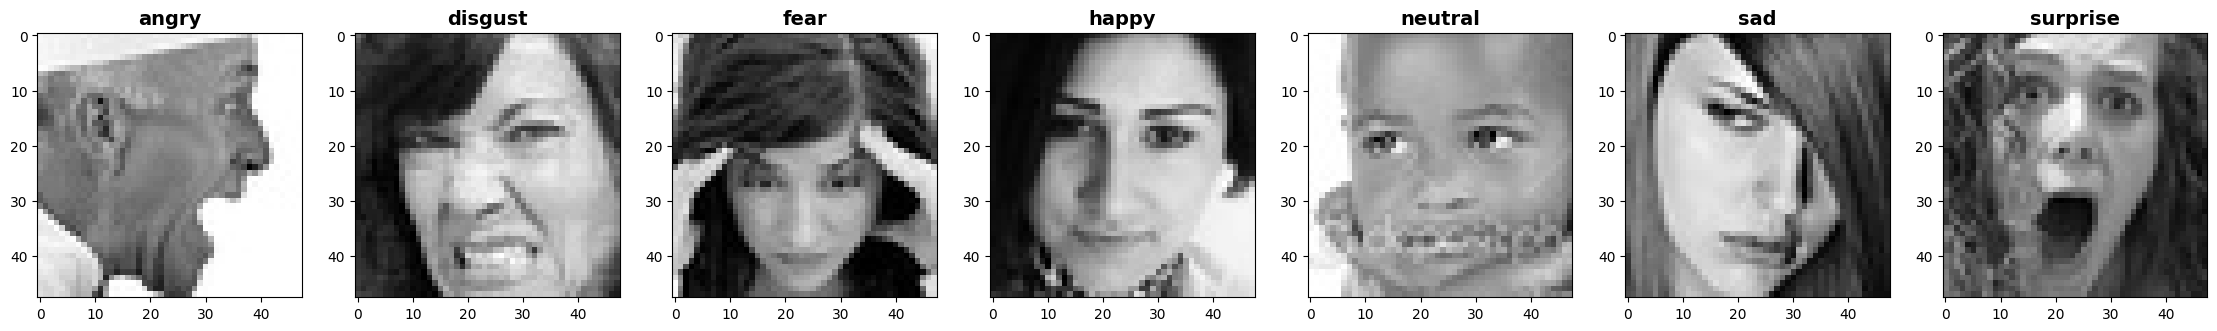

In [ ]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}

fig, axes = plt.subplots(1, len(expressions_list), figsize=(len(expressions_list) * 4, 4))

i = 0

while i < len(expressions_list):

    expression = expressions_list[i]

    expression_directory = os.path.join(train_directory, expression)
    images_list = os.listdir(expression_directory)

    image_directory = os.path.join(expression_directory, random.choice(images_list))

    image = cv2.imread(image_directory, cv2.IMREAD_GRAYSCALE)

    axes[i].imshow(image, cmap="gray")
    axes[i].set_title(expression, fontdict=title_font)

    i += 1

plt.show()

In [ ]:
print(f"Images shape is: {image.shape}")


Images shape is: (48, 48)


In [ ]:
formats = []

for dir in [train_directory, test_directory]:

    i = 0

    print(f"Checking {dir.split('/')[1]} data:")

    while i < len(expressions_list):

        expression = expressions_list[i]

        expression_directory = os.path.join(dir, expression)
        images_list = os.listdir(expression_directory)

        for image in images_list:

            format = image.split(".")[1]

            if format not in formats:
                formats.append(format)

        print(f"    {expression} Checked.")

        i += 1

print("-"*30)
print(f"File formats are: {formats}")

Checking content data:
    angry Checked.
    disgust Checked.
    fear Checked.
    happy Checked.
    neutral Checked.
    sad Checked.
    surprise Checked.
Checking content data:
    angry Checked.
    disgust Checked.
    fear Checked.
    happy Checked.
    neutral Checked.
    sad Checked.
    surprise Checked.
------------------------------
File formats are: ['jpg']


In [ ]:
data = tf.keras.preprocessing.image_dataset_from_directory(train_directory,
                                                           image_size=(48, 48),
                                                           batch_size=64,
                                                           color_mode="grayscale")

print(f"Data type is:       {type(data)}")

Found 28709 files belonging to 7 classes.
Data type is:       <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [ ]:
expressions_list = data.class_names

expressions_list

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
data_iterator = data.as_numpy_iterator()

data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7fa2281cc5b0>)

In [ ]:
batch = data_iterator.next()

print(f"Each batch has {len(batch)} parts of data.")
print(f"Each batch's images part has the shape of {batch[0].shape}")
print(f"Each batch's images part has the shape of {batch[1].shape}")


Each batch has 2 parts of data.
Each batch's images part has the shape of (64, 48, 48, 1)
Each batch's images part has the shape of (64,)


Facial expressions are:
    0. angry
    1. disgust
    2. fear
    3. happy
    4. neutral
    5. sad
    6. surprise


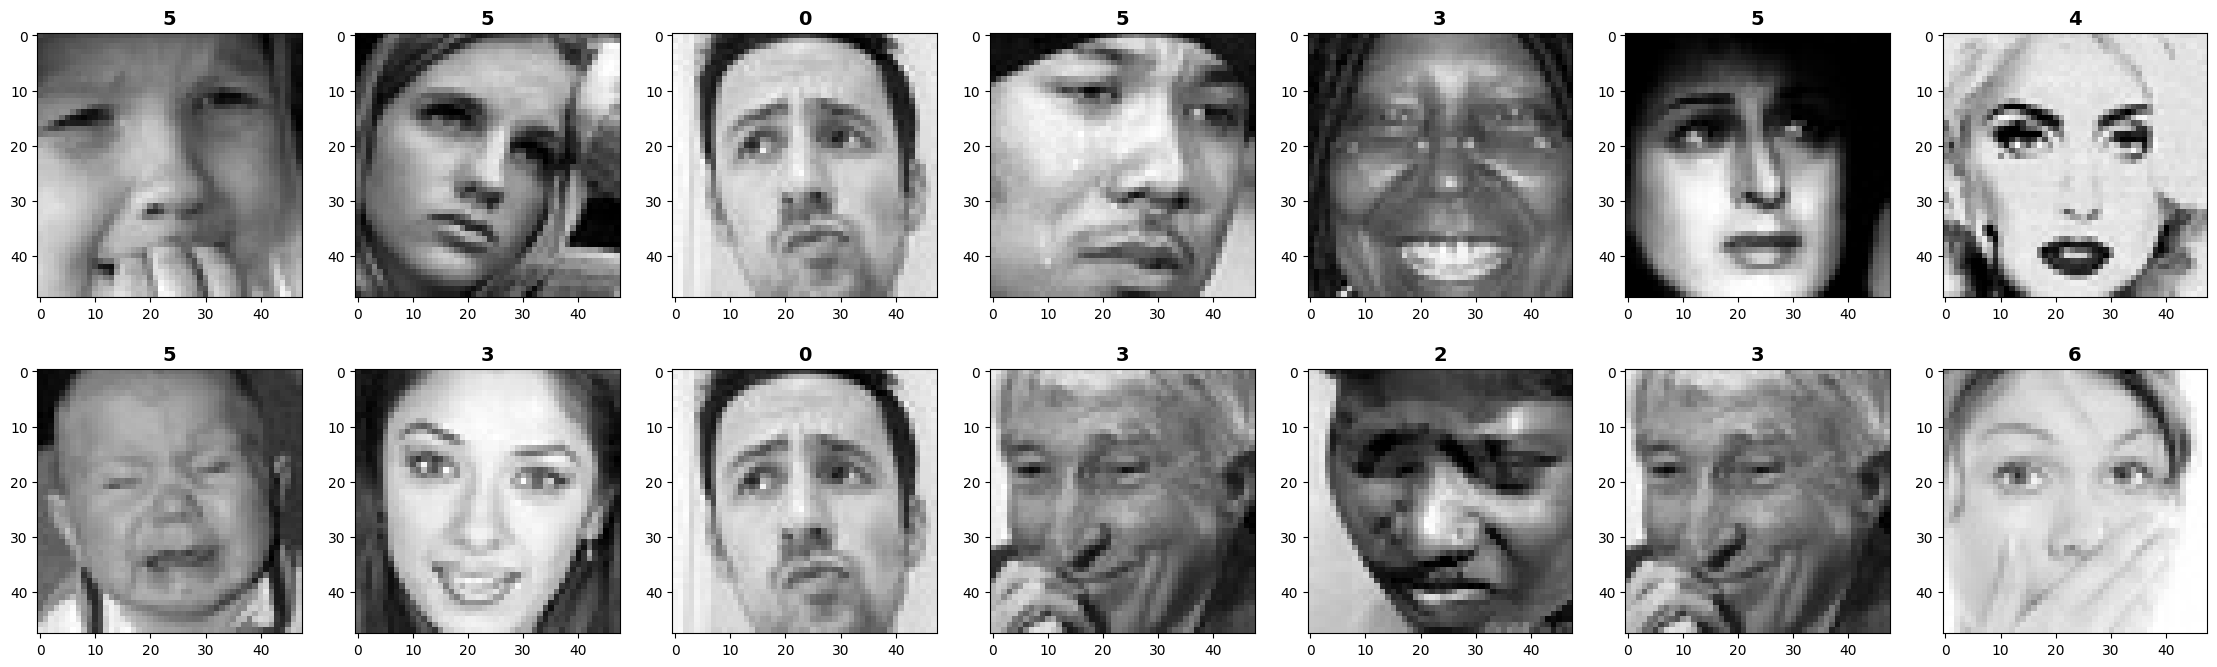

In [ ]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}

print("Facial expressions are:")

for expression in expressions_list:
    print(f"    {expressions_list.index(expression)}. {expression}")

indexes = np.random.randint(0, batch[0].shape[0], 14)

fig, axes = plt.subplots(2, 7, figsize=(28, 8))

i = 0
j = 0

for index in indexes:

    axes[i, j].imshow(batch[0][index].astype(int), cmap="gray")
    axes[i, j].set_title(batch[1][index], fontdict=title_font)

    j += 1

    if j==7:
        i = 1
        j = 0

plt.show()

In [ ]:
print(f"Data Minimum: {batch[0].min()}")
print(f"Data Maximum: {batch[0].max()}")

Data Minimum: 0.0
Data Maximum: 255.0


In [ ]:
data = data.map(lambda x, y: (x/255., y))


In [ ]:
batch = data.as_numpy_iterator().next()

print(f"Data Minimum: {batch[0].min()}")
print(f"Data Maximum: {batch[0].max()}")

Data Minimum: 0.0
Data Maximum: 1.0


In [ ]:
train_size = int(len(data)*0.875)
validation_size = int(len(data)*0.125)

print(f"The train dataset size will be {train_size}.")
print(f"The validation dataset size will be {validation_size}.")

The train dataset size will be 392.
The validation dataset size will be 56.


In [ ]:
train = data.take(train_size)
validation = data.skip(train_size).take(validation_size)

In [ ]:
def get_compiled_model(input_shape, optimizer, loss, metrics):
    """
    This is a Python function that compiles and returns a neural network model using the Keras library.

    Args:
        input_shape (tuple)             The shape of the input data for the model.
        optimizer (str or callable)     The optimizer to use for training the model.
        loss (str or callable)          The loss function to use during training.
        metrics (list)                  The list of evaluation metrics for the model.

    Returns:
        model ()                        The compiled Keras model object that can be used for training.
    """

    model = Sequential()

    # Convolutional and pooling layers

    model.add(Conv2D(32, (3, 3), strides=1, activation="relu",
                     padding="same", input_shape=(48, 48, 1)))

    model.add(Conv2D(64, (3, 3), strides=1, activation="relu",
                     padding="same"))

    model.add(BatchNormalization())

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Dropout(0.25))

    # Convolutional and pooling layers

    model.add(Conv2D(128, (3, 3), strides=1, activation="relu",
                     padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.01)))

    model.add(Conv2D(256, (3, 3), strides=1, activation="relu",
                     padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.01)))

    model.add(BatchNormalization())

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Dropout(0.25))

    # Flatten and dense layer

    model.add(Flatten())

    model.add(Dense(256, activation="relu"))

    model.add(BatchNormalization())

    model.add(Dropout(0.25))

    # Flatten and dense layer

    model.add(Dense(512, activation="relu"))

    model.add(BatchNormalization())

    model.add(Dropout(0.25))

    # Final layer

    model.add(Dense(7, activation="softmax"))

    # Compiler

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model

In [ ]:
def train_model(model, train_data, epochs, validation_data, callbacks):
    """
    Summary:
    This is a Python function that trains a given neural network model
    on the provided training data and returns the training history.

    Args:
        model (tensorflow.keras model)          The neural network model object to train.
        train_data (numpy.ndarray)              The training data to use for training the model.
        train_target (numpy.ndarray)            The target values for the training data.
        epochs (int)                            The number of epochs to train the model.
        validation_data (numpy.ndarray)         The validation data to use for evaluation.
        callbacks (list)                        A list of Keras callbacks to use during training.

    Returns:
        history ()                              The training history object that contains information
                                                about the training and validation metrics over each epoch.
    """

    history = model.fit(train_data,
                        epochs=epochs,
                        validation_data=validation_data,
                        callbacks=callbacks,
                        verbose=1)

    return history

In [ ]:
class TrainingCallbacks(Callback):

    def __init__(self):
        self.start_time = None

    def on_train_begin(self, logs=None):
        self.start_time = time.time()
        print("Starting training ...")

    def on_epoch_end(self, epoch, logs=None):
        elapsed_time = time.time() - self.start_time
        print(f"Epoch {epoch + 1} completed in {elapsed_time:.2f} seconds")

    def on_train_end(self, logs=None):
        total_time = time.time() - self.start_time
        print(f"Training finished in {total_time:.2f} seconds")

logs_cb = callbacks.TensorBoard(log_dir="logs")

checkpoint = callbacks.ModelCheckpoint(filepath=os.path.join("checkpoints", "model.keras"),
                                       save_best_only=True,
                                       monitor="val_accuracy")

callbacks_list = [TrainingCallbacks(), logs_cb, checkpoint]

In [ ]:
model = get_compiled_model((48, 48, 1),
                           optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                           loss="sparse_categorical_crossentropy",
                           metrics=["accuracy"])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       9,437,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,964,807 (38.01 MB)

 Trainable params: 9,962,631 (38.00 MB)

 Non-trainable params: 2,176 (8.50 KB)

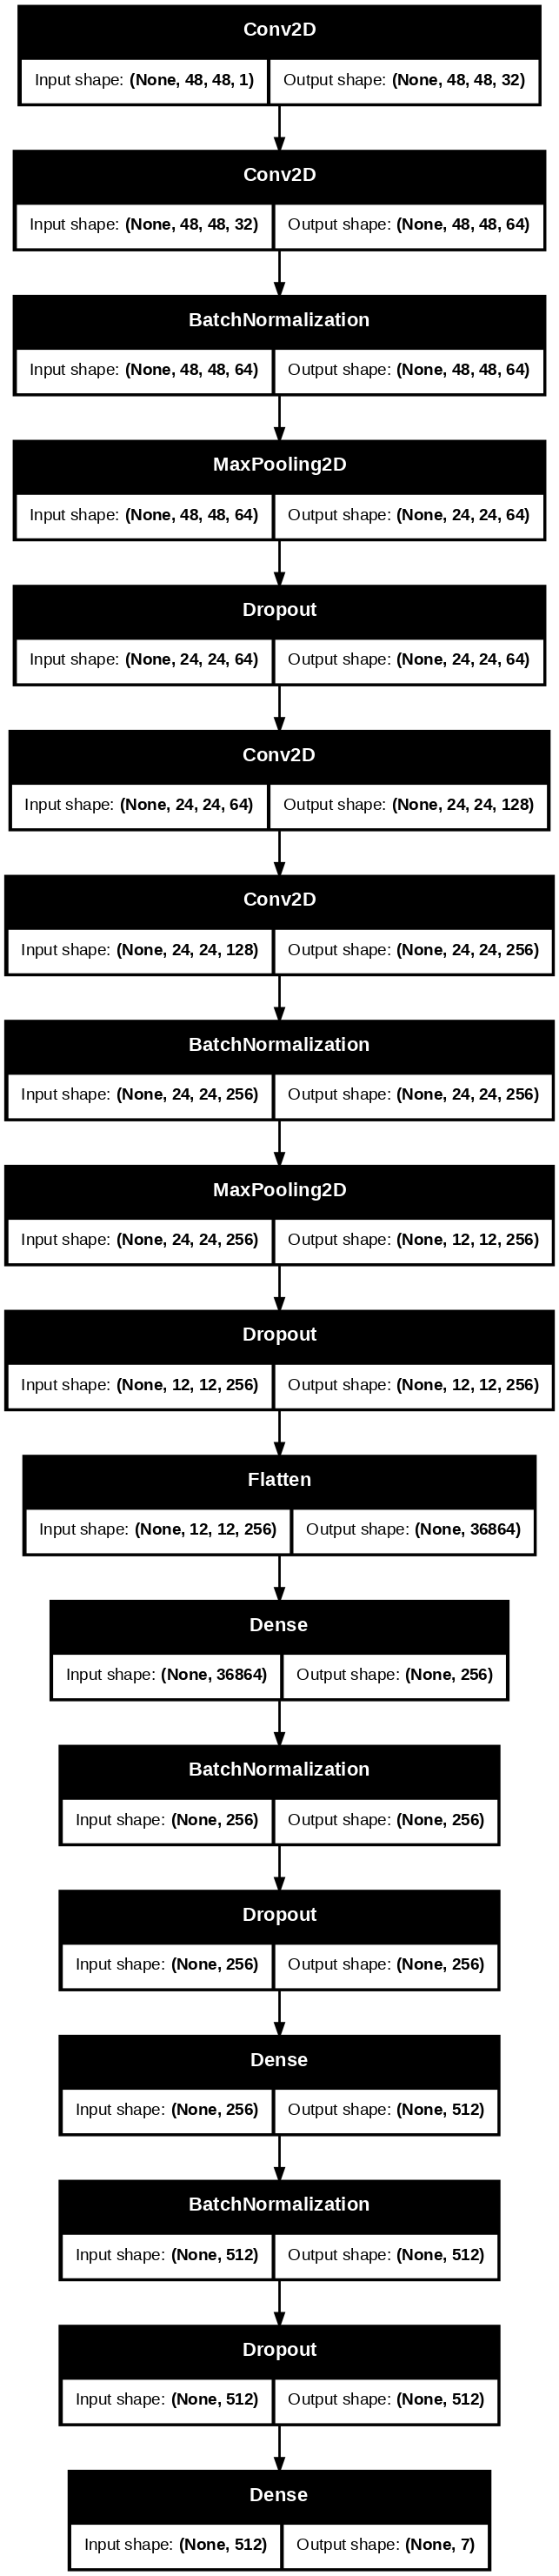

In [ ]:
plot_model(model, show_shapes=True,
           show_layer_names=False,
           expand_nested=True,
           rankdir="TB",
           dpi=100)

In [ ]:
history = train_model(model,
                      train_data=train,
                      epochs=40,
                      validation_data=validation,
                      callbacks=callbacks_list)


Starting training ...
Epoch 1/40
392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2361 - loss: 4.8394 Epoch 1 completed in 4810.67 seconds
392/392 ━━━━━━━━━━━━━━━━━━━━ 4811s 12s/step - accuracy: 0.2362 - loss: 4.8387 - val_accuracy: 0.1479 - val_loss: 8.8575
Epoch 2/40
392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.3588 - loss: 4.0084Epoch 2 completed in 4982.57 seconds
392/392 ━━━━━━━━━━━━━━━━━━━━ 172s 388ms/step - accuracy: 0.3589 - loss: 4.0081 - val_accuracy: 0.3834 - val_loss: 3.6219
Epoch 3/40
392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.4063 - loss: 3.5244Epoch 3 completed in 5127.02 seconds
392/392 ━━━━━━━━━━━━━━━━━━━━ 144s 368ms/step - accuracy: 0.4064 - loss: 3.5241 - val_accuracy: 0.4475 - val_loss: 3.1626
Epoch 4/40
392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.4448 - loss: 3.1027Epoch 4 completed in 5328.48 seconds
392/392 ━━━━━━━━━━━━━━━━━━━━ 202s 370ms/step - accuracy: 0.4448 - loss: 3.1024 - val_accuracy: 0.4886 - val_loss: 2.7999


In [ ]:


model.save('/content/drive/MyDrive/emotion detection/emotion dataset/emotion_detection_model_2.h5')

In [ ]:
history_df = pd.DataFrame(history.history)

history_df

,accuracy,loss,val_accuracy,val_loss
0,0.280014,4.562230,0.147879,8.857549
1,0.367467,3.888277,0.383371,3.621934
2,0.415737,3.408774,0.447545,3.162573
3,0.453125,3.008249,0.488560,2.799927
4,0.498605,2.659685,0.431083,2.913420
5,0.532526,2.374307,0.506138,2.366370
6,0.563098,2.132499,0.524275,2.226770
7,0.603755,1.904530,0.544085,2.006532
8,0.637596,1.707987,0.568638,1.878541
9,0.671277,1.525894,0.570033,1.792430


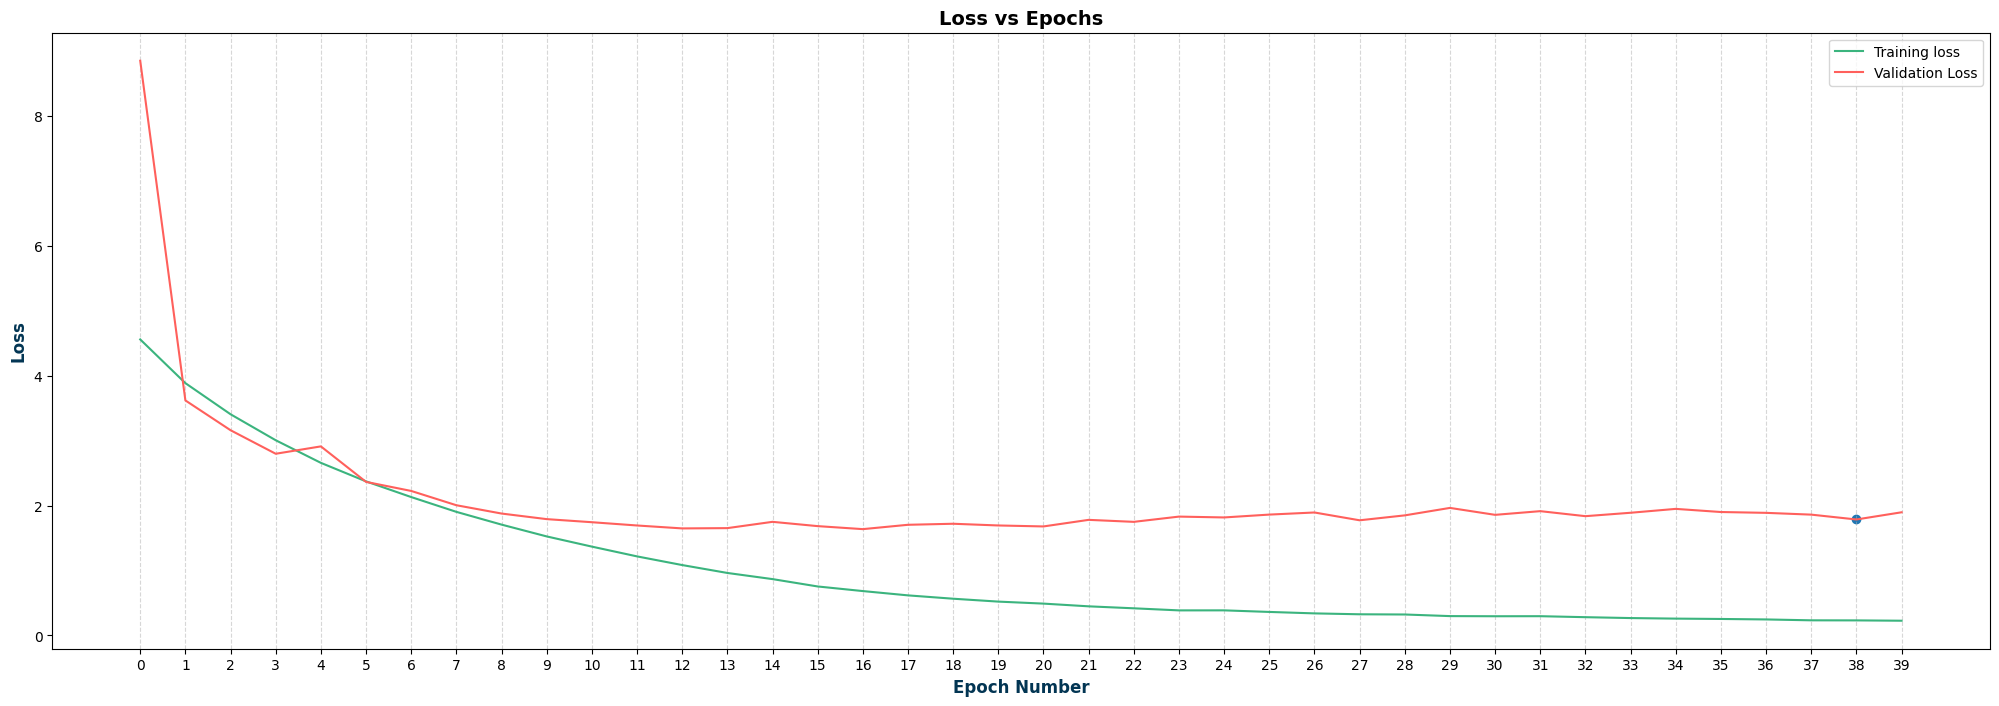

In [ ]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
axes_font = {"family" : "arial", "color" : "#023553", "weight" : "bold", "size" : 12}

fig = plt.figure(figsize=(25, 8))

# Accessing the 'loss' and 'val_loss' from history.history
plt.plot(history.history["loss"], color="#3BB47E", label="Training loss") # Changed line
plt.plot(history.history["val_loss"], color="#FF605C", label="Validation Loss") # Changed line

plt.xticks(range(len(history.history["loss"]))) # Changed line

plt.legend(loc="upper right")

plt.title("Loss vs Epochs", fontdict = title_font)
plt.xlabel("Epoch Number", fontdict = axes_font)
plt.ylabel("Loss", fontdict = axes_font)

plt.grid(True, axis="x", alpha=0.5, linestyle="--")

max_val_acc_row_index = history_df[history_df["val_accuracy"] == max(history_df["val_accuracy"])].index[-1]

plt.scatter(max_val_acc_row_index,
            history_df.loc[max_val_acc_row_index, "val_loss"])

plt.show()

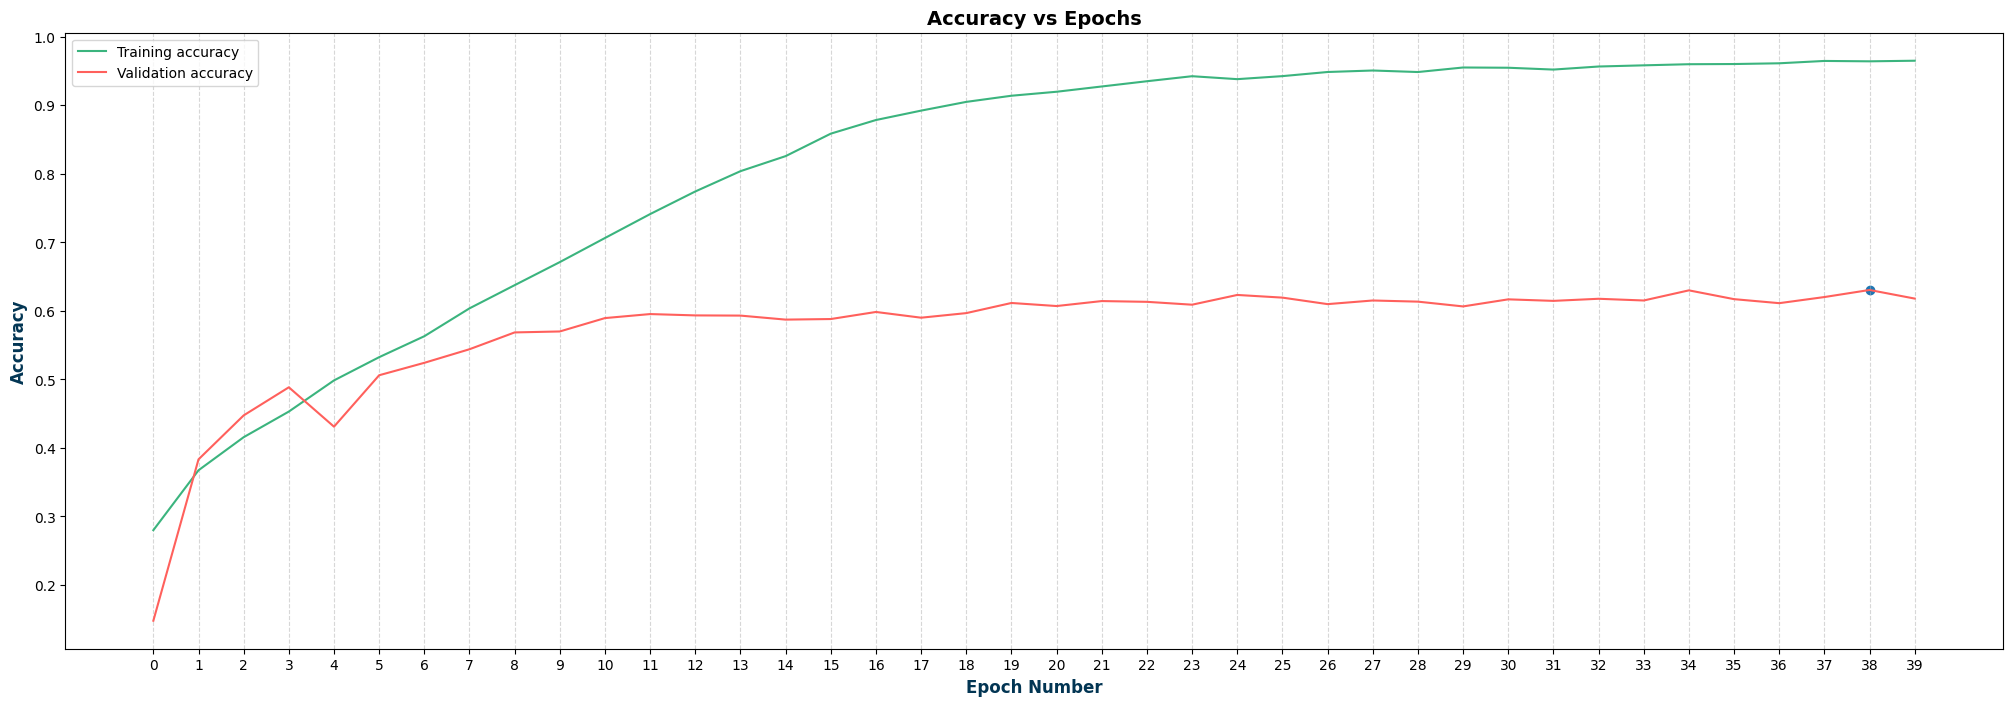

In [ ]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
axes_font = {"family" : "arial", "color" : "#023553", "weight" : "bold", "size" : 12}

fig = plt.figure(figsize=(25, 8))

# Accessing 'accuracy' and 'val_accuracy' from history.history
plt.plot(history.history["accuracy"], color="#3BB47E", label="Training accuracy")
plt.plot(history.history["val_accuracy"], color="#FF605C", label="Validation accuracy")

plt.xticks(range(len(history.history["accuracy"])))

plt.legend(loc="upper left")

plt.title("Accuracy vs Epochs", fontdict = title_font)
plt.xlabel("Epoch Number", fontdict = axes_font)
plt.ylabel("Accuracy", fontdict = axes_font)

plt.grid(True, axis="x", alpha=0.5, linestyle="--")

plt.scatter(max_val_acc_row_index,
            history_df.loc[max_val_acc_row_index, "val_accuracy"])

plt.show()

In [ ]:
accuracy = Accuracy()
categorical_accuracy = CategoricalAccuracy()

In [ ]:
test_directory = os.path.join("/content/drive/MyDrive/emotion detection/emotion dataset", "test")

test = tf.keras.preprocessing.image_dataset_from_directory(test_directory,
                                                           image_size=(48, 48),
                                                           batch_size=64,
                                                           color_mode="grayscale")

Found 7178 files belonging to 7 classes.


In [ ]:
num_classes = 7
confusion_matrix = np.zeros((num_classes, num_classes))

for batch in test.as_numpy_iterator():

    test_data, test_target = batch
    test_target = to_categorical(test_target, num_classes=num_classes)

    test_target_pred = model.predict(test_data, verbose=0)

    categorical_accuracy.update_state(test_target, test_target_pred)
    accuracy.update_state(test_target, test_target_pred)

    test_target_pred_labels = np.argmax(test_target_pred, axis=1)

    batch_confusion_matrix = sk_confusion_matrix(np.argmax(test_target, axis=1), test_target_pred_labels, labels=range(num_classes))
    confusion_matrix += batch_confusion_matrix

In [ ]:
print("Testing Results")
print("-"*30)

print(f"Accuracy               {(accuracy.result()*100):.4f}")
print(f"Categorical Accuracy   {(categorical_accuracy.result()*100):.4f}")

Testing Results
------------------------------
Accuracy               77.0051
Categorical Accuracy   33.8813


In [ ]:
from google.colab import files
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import random
from PIL import Image
import io

# Load the emotion prediction model (make sure to replace this with your actual model path)
emotion_model = load_model('/content/drive/MyDrive/emotion detection/emotion dataset/emotion_detection_model_2.h5')

# Updated emotion to genre mapping
emotion_to_genre = {
    "angry": ["Action", "Thriller", "Drama", "Crime"],
    "disgust": ["Horror", "Thriller", "Crime", "Drama"],
    "fear": ["Horror", "Action", "Thriller", "Mystery"],
    "happy": ["Comedy", "Romance", "Fantasy", "Musical"],
    "neutral": ["Documentary", "Fantasy", "Comedy", "Sci-Fi"],
    "sad": ["Drama", "Romantic", "Documentary", "Comedy"],
    "surprise": ["Mystery", "Action", "Adventure", "Sci-Fi"]
}

# Load movie dataset (replace with your actual file path)
movies_df = pd.read_csv('/content/movies_with_ratings.csv')  # Ensure to load the combined file

# Preprocessing function for emotion model
def preprocess_image(frame):
    # Resize the image to 48x48
    frame_resized = cv2.resize(frame, (48, 48))

    # Convert the image to grayscale (if not already in grayscale)
    gray_image = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)

    # Normalize the image (scale pixel values to [0, 1])
    normalized_image = gray_image / 255.0

    # Reshape to match the input shape expected by the model (48, 48, 1)
    reshaped_image = np.reshape(normalized_image, (48, 48, 1))

    # Add a batch dimension so the shape is (1, 48, 48, 1)
    reshaped_image = np.expand_dims(reshaped_image, axis=0)

    return reshaped_image

# Function to recommend movies based on predicted emotion
def recommend_movies(predicted_emotion):
    # Get the genres corresponding to the predicted emotion
    recommended_genres = emotion_to_genre.get(predicted_emotion, [])

    # Filter the movie dataset based on these genres
    filtered_movies = movies_df[movies_df['genres'].apply(lambda x: any(genre in x for genre in recommended_genres))]

    # Ensure uniqueness and randomness by shuffling and selecting 10 movies
    unique_movies = filtered_movies.drop_duplicates(subset='title')

    # Randomly sample 10 unique movies
    recommended_movies = unique_movies.sample(n=10, random_state=42)

    return recommended_movies

# Function to upload image using file dialog
def upload_image():
    # Upload image using file dialog
    uploaded = files.upload()

    # Get the file name and read the image
    for fn in uploaded.keys():
        print(f"User uploaded file: {fn}")

        # Read the image as a numpy array
        img_data = uploaded[fn]
        img = Image.open(io.BytesIO(img_data))
        img = np.array(img)

        # Convert image to BGR (OpenCV uses BGR)
        img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        return img_bgr

# Give user time to prepare before uploading the image
print("Select an image for emotion prediction...")

# Upload the image using the file dialog
image = upload_image()

if image is not None:
    # Preprocess the uploaded image
    preprocessed_image = preprocess_image(image)

    # Pass the preprocessed image to the emotion prediction model
    predicted_emotion = emotion_model.predict(preprocessed_image)

    # Map the predicted emotion index to the emotion label
    emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    predicted_emotion_label = emotion_labels[np.argmax(predicted_emotion)]

    # Show the predicted emotion
    print(f"Predicted Emotion: {predicted_emotion_label}")

    # Recommend movies based on the predicted emotion
    recommended_movies = recommend_movies(predicted_emotion_label)

    if not recommended_movies.empty:
        print("Recommended Movies:")
        # Display the top 10 recommended movies with titles and ratings
        for index, row in recommended_movies.iterrows():
            print(f"Title: {row['title']}, Rating: {row['rating']}")
    else:
        print("No movies found for the predicted emotion.")
else:
    print("No image uploaded. Exiting.")


Select an image for emotion prediction...


Saving 24_33.jpg to 24_33.jpg
User uploaded file: 24_33.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
Predicted Emotion: sad
Recommended Movies:
Title: Lucky You (2007), Rating: 3.0
Title: Mozart and the Whale (2005), Rating: 2.5
Title: Rocky IV (1985), Rating: 2.7
Title: Holes (2003), Rating: 3.4
Title: My Giant (1998), Rating: 3.0
Title: I'm Gonna Git You Sucka (1988), Rating: 2.9
Title: Stand and Deliver (1988), Rating: 3.5
Title: Winslow Boy, The (1999), Rating: 3.0
Title: World of Henry Orient, The (1964), Rating: 4.0
Title: Son of a Gun (2014), Rating: 2.5
